<a href="https://colab.research.google.com/github/ManuelOtt-code/Project-DC/blob/master/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install rdkit
%pip install openpyxl
from rdkit import Chem
import os
!wget https://github.com/ManuelOtt-code/Project-DC/raw/refs/heads/master/AntiOx_filtering_test.xlsx #run this only once per session
!wget https://github.com/ManuelOtt-code/Project-DC/raw/refs/heads/master/func.py
from func import is_substruct_in

--2025-04-06 21:07:51--  https://github.com/ManuelOtt-code/Project-DC/raw/refs/heads/master/AntiOx_filtering_test.xlsx
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ManuelOtt-code/Project-DC/refs/heads/master/AntiOx_filtering_test.xlsx [following]
--2025-04-06 21:07:52--  https://raw.githubusercontent.com/ManuelOtt-code/Project-DC/refs/heads/master/AntiOx_filtering_test.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1653848 (1.6M) [application/octet-stream]
Saving to: ‘AntiOx_filtering_test.xlsx’

AntiOx_filtering_te 100%[===================>]   1.58M  5.39MB/s    in 0.3s    

2025-04-

In [8]:

df = pd.read_excel("AntiOx_filtering_test.xlsx")
df

,AOX ID,SMILES,InChI,Molecular Formula,Molecular Weight,AlogP,HBD,HBA,Polar Surface Area,Rotatable Bonds,...,Efficacy,Phenotype-Replicate_1,Potency-Replicate_1,Efficacy-Replicate_1,Experimental Data,Target ChEMBL ID,Target Pref Name,Cell Line Target,Solubility,Solubility Level
0,AOXMO26283,CC(=O)Oc1ccc(/C=C2\CCC/C(=C\c3ccc(OC(C)=O)c(OC...,InChI=1S/C28H26O9/c1-16(29)34-24-10-8-20(14-26...,C28H26O9,506.5,4.61,0,9,122.3,6,...,NaN,NaN,NaN,NaN,IC50 >= 100000 nM,CHEMBL3879801,NaN,NaN,-4.394,2
1,AOXMO26284,CCC(=O)Oc1ccc(/C=C2\CCC/C(=C\c3ccc(OC(=O)CC)c(...,InChI=1S/C28H30O7/c1-5-26(29)34-22-12-10-18(16...,C28H30O7,478.5,5.55,0,7,88.1,8,...,NaN,NaN,NaN,NaN,IC50 >= 100000 nM,CHEMBL3879801,NaN,NaN,-5.943,2
2,AOXMO26285,COc1cc(/C=C2\CCC/C(=C\c3ccc(OC(C)=O)c(OC)c3)C2...,InChI=1S/C26H26O7/c1-16(27)32-22-10-8-18(14-24...,C26H26O7,450.5,4.77,0,7,88.1,6,...,NaN,NaN,NaN,NaN,IC50 >= 100000 nM,CHEMBL3879801,NaN,NaN,-5.135,2
3,AOXMO26286,CC(=O)Oc1ccc(/C=C2\CC/C(=C\c3ccc(OC(C)=O)c(OC(...,InChI=1S/C27H24O9/c1-15(28)33-23-9-5-19(13-25(...,C27H24O9,492.5,4.22,0,9,122.3,6,...,NaN,NaN,NaN,NaN,IC50 >= 100000 nM,CHEMBL3879801,NaN,NaN,-4.033,2
4,AOXMO26287,COc1cc(/C=C2\CC/C(=C\c3ccc(OC(C)=O)c(OC)c3)C2=...,InChI=1S/C25H24O7/c1-15(26)31-21-9-5-17(13-23(...,C25H24O7,436.5,4.38,0,7,88.1,6,...,NaN,NaN,NaN,NaN,IC50 >= 100000 nM,CHEMBL3879801,NaN,NaN,-4.754,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5165,AOXMO04063,O=C(CC1SC(=O)NC1=O)Nc1nc(-c2ccc(Cl)cc2)cs1,InChI=1S/C14H10ClN3O3S2/c15-8-3-1-7(2-4-8)9-6-...,C14H10ClN3O3S2,367.8,3.14,2,6,88.2,4,...,NaN,NaN,NaN,NaN,EC50,CHEMBL3879801,NaN,NaN,-4.601,2
5166,AOXMO04064,O=C(CC1SC(=O)NC1=O)Nc1nc(-c2ccccc2)cs1,InChI=1S/C14H11N3O3S2/c18-11(6-10-12(19)17-14(...,C14H11N3O3S2,333.4,2.49,2,6,88.2,4,...,NaN,NaN,NaN,NaN,EC50,CHEMBL3879801,NaN,NaN,-3.802,3
5167,AOXMO19507,CN(C)CCN(CC1CCCN(C2Cc3ccccc3C2)C1)C(=O)c1cc2cc...,InChI=1S/C29H35N3O3/c1-30(2)14-15-32(28(33)26-...,C29H35N3O3,473.6,3.68,0,6,57.0,7,...,NaN,NaN,NaN,NaN,EC50,CHEMBL2362975,No relevant target,NaN,-5.046,2
5168,AOXMO30152,CCCCCCCCCCCC(=O)Nc1cc2c(cc1F)c(=O)c(C(=O)OCC)c...,InChI=1S/C26H37FN2O4/c1-4-7-8-9-10-11-12-13-14...,C26H37FN2O4,460.6,6.20,1,6,77.4,14,...,NaN,NaN,NaN,NaN,EC50,CHEMBL2362975,No relevant target,NaN,-5.419,2


In [9]:
phenol = "c1ccccc1[OH]"
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit import RDLogger
RDLogger.DisableLog("rdApp.info")

df["standardized_smiles"] = df["SMILES"].apply(rdMolStandardize.StandardizeSmiles) #standardizing smiles

df["is_phenol"] = df["standardized_smiles"].apply(is_substruct_in, substruct_smarts = phenol) # checking if Molecule has a phenol element in it

df_is_phenol = df[df["is_phenol"] == 1]

In [10]:
print(len(df_is_phenol), len(df))
df.columns
df[["value", "unit"]] = df["Experimental Data"].str.extract(r"(?:IC50|EC50)\s*(?:[<>=]{1,2})?\s*([\d\.]+)\s*([A-Za-zμµugUG\/\.\-\·]+)") #Extracting values and units
df_is_not_na = df[df["value"].notna()]
df["value"] = df["value"].astype(float) #converting to float
len(df_is_not_na)

3048 5170


5064

In [ ]:
def ug_mL_to_nM(value, MW):
  value/(MW*10**9) #(ug*10**(-6)ug/ng*10**-3L/mL)/MW

['nM' 'ug.mL-' nan]


,AOX ID,SMILES,InChI,Molecular Formula,Molecular Weight,AlogP,HBD,HBA,Polar Surface Area,Rotatable Bonds,...,Experimental Data,Target ChEMBL ID,Target Pref Name,Cell Line Target,Solubility,Solubility Level,standardized_smiles,is_phenol,value,unit
89,AOXMO26860,CCOc1ccc(-c2cc(-c3ccccc3O)nc(=O)[nH]2)cc1,InChI=1S/C18H16N2O3/c1-2-23-13-9-7-12(8-10-13)...,C18H16N2O3,308.3,3.21,2,5,75.2,4,...,IC50 > 500 ug.mL-1,CHEMBL613712,NaN,NaN,-4.640,2,CCOc1ccc(-c2cc(-c3ccccc3O)nc(=O)[nH]2)cc1,1,500.00,ug.mL-
90,AOXMO26862,CCOc1ccc(-c2cc(-c3ccccc3O)nc(=O)[nH]2)cc1OC,InChI=1S/C19H18N2O4/c1-3-25-17-9-8-12(10-18(17...,C19H18N2O4,338.4,3.22,2,6,84.4,5,...,IC50 > 500 ug.mL-1,CHEMBL613712,NaN,NaN,-4.781,2,CCOc1ccc(-c2cc(-c3ccccc3O)nc(=O)[nH]2)cc1OC,1,500.00,ug.mL-
91,AOXMO26864,COc1ccc(-c2cc(-c3ccccc3O)nc(=O)[nH]2)cc1OC,InChI=1S/C18H16N2O4/c1-23-16-8-7-11(9-17(16)24...,C18H16N2O4,324.3,2.83,2,6,84.4,4,...,IC50 > 500 ug.mL-1,CHEMBL613712,NaN,NaN,-4.574,2,COc1ccc(-c2cc(-c3ccccc3O)nc(=O)[nH]2)cc1OC,1,500.00,ug.mL-
92,AOXMO26866,COc1ccccc1-c1cc(-c2ccccc2O)nc(=O)[nH]1,InChI=1S/C17H14N2O3/c1-22-16-9-5-3-7-12(16)14-...,C17H14N2O3,294.3,2.82,2,5,75.2,3,...,IC50 > 500 ug.mL-1,CHEMBL613712,NaN,NaN,-4.453,2,COc1ccccc1-c1cc(-c2ccccc2O)nc(=O)[nH]1,1,500.00,ug.mL-
93,AOXMO26868,O=c1nc(-c2ccccc2O)cc(-c2ccc(Br)cc2)[nH]1,InChI=1S/C16H11BrN2O2/c17-11-7-5-10(6-8-11)13-...,C16H11BrN2O2,343.2,3.57,2,4,66.0,2,...,IC50 > 500 ug.mL-1,CHEMBL613712,NaN,NaN,-5.177,2,O=c1nc(-c2ccccc2O)cc(-c2ccc(Br)cc2)[nH]1,1,500.00,ug.mL-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5156,AOXMO25592,CCC(=O)OCCc1ccc(O)c(O)c1,InChI=1S/C11H14O4/c1-2-11(14)15-6-5-8-3-4-9(12...,C11H14O4,210.2,1.59,2,4,66.8,4,...,EC50 = 0.56 ug.mL-1,CHEMBL613712,NaN,NaN,-1.798,4,CCC(=O)OCCc1ccc(O)c(O)c1,1,0.56,ug.mL-
5157,AOXMO20845,O=c1cc(-c2cc(O)c(O)c(O)c2)oc2ccccc12,InChI=1S/C15H10O5/c16-10-7-14(20-13-4-2-1-3-9(...,C15H10O5,270.2,2.58,3,5,90.9,1,...,EC50 = 0.33 ug.mL-1,CHEMBL2362975,No relevant target,NaN,-2.983,3,O=c1cc(-c2cc(O)c(O)c(O)c2)oc2ccccc12,1,0.33,ug.mL-
5158,AOXMO20847,O=c1c(F)c(-c2cc(O)c(O)c(O)c2)oc2ccccc12,InChI=1S/C15H9FO5/c16-12-13(19)8-3-1-2-4-11(8)...,C15H9FO5,288.2,2.72,3,5,90.9,1,...,EC50 = 0.24 ug.mL-1,CHEMBL2362975,No relevant target,NaN,-3.255,3,O=c1c(F)c(-c2cc(O)c(O)c(O)c2)oc2ccccc12,1,0.24,ug.mL-
5159,AOXMO42789,CCOC(=O)/C=C/c1ccc(O)c(O)c1,InChI=1S/C11H12O4/c1-2-15-11(14)6-4-8-3-5-9(12...,C11H12O4,208.2,1.67,2,4,66.8,3,...,EC50 = 0.18 ug.mL-1,CHEMBL2362975,No relevant target,NaN,-1.820,4,CCOC(=O)/C=C/c1ccc(O)c(O)c1,1,0.18,ug.mL-


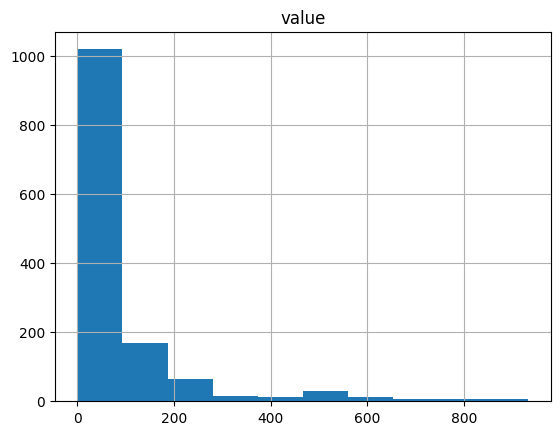

In [13]:
df[df["value"] < 1000].hist(column = "value")
unique_values = df["unit"].unique()
print(unique_values)
mask = df["unit"] == "ug.mL-1"


df.loc[mask, "value"] = df.loc[mask].apply(
    lambda row: ug_mL_to_nM(row["value"], row["Molecular Weight"]),
    axis=1
)


df.loc[mask, "unit"] = "nM"